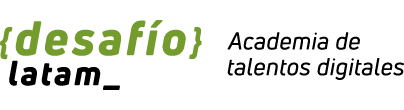

<center><h1> <font color='green'>Manipulación y transformación de datos - III</font></h1></center>

 # <font color='green'>Funciones - Definición básica</font>


## <font color='green'>Componentes de una función</font>

Python cuenta con funciones ya definidas -conocidas como **built-in functions**, que memos utilizado durante este módulo como **print**, **input**, etc. Veremos ahora cómo podemos definir una función nosotros mismos (**user defined functions**) para realizar más fácilmente las tareas que deseemos.

Supongamos que en un curso se realizan 3 pruebas y 5 tareas, además de un examen final. La nota de cada estudiante se calcula considerando que:

- El promedio de las pruebas corresponde al 50% de la nota final
- El promedio de las tareas corresponde al 30% de la nota final
- El examen corresponde al 20% de la nota final.

La nota de cada estudiante depende, en total, de 12 valores: las 9 notas y los tres porcentajes o ponderaciones dadas. Si queremos establecer una fórmula que calcule la nota final tendremos que considerar estos 12 valores o **parámetros**. Pero ya que consideramos los porcentajes como valores fijos (aunque podrían modificarse), las notas obtenidas corresponderán a los **argumentos** de nuestra función, es decir, los valores que recibiremos de un usuario para realizar nuestros cálculos.

Considerando esto, analizaremos el siguiente bloque de código:

In [1]:
def nota_final(prueba1,prueba2,prueba3,tarea1,tarea2,tarea3,tarea4,tarea5,examen):
    promedio_pruebas=round((prueba1+prueba2+prueba3)/3,1)
    promedio_tareas=round((tarea1+tarea2+tarea3+tarea4+tarea5)/5,1)
    final=round(0.5*promedio_pruebas+0.3*promedio_tareas+0.2*examen,1)
    print(final)

Podemos observar que:
- Utilizamos la palabra reservada **def** para señalar que estamos definiendo una función.
- Luego viene el nombre de la función, en nuestro caso **nota_final**. Aunque podŕiamos ponerle cualquier nombre, es una buena práctica llamarla de una manera intuitiva, que se relacione con lo que realiza. Si utilizamos más de una palabra, se utiliza el guión bajo para unirlas, y siempre con minúsculas. Esto se conoce como **snake case**, y es un formato establecido para la creación de funciones en Python.
- Junto al nombre de la función, entre paréntesis, escribimos todos sus argumentos, y finalizamos con **:**.
- Luego de los **:**, si presionamos **enter**, el bloque de código estará con indentación, para delimitar que esto corresponde a la definición o **cuerpo** de la función. Aquí escribimos tomas las instrucciones que queremos que nuestra función ejecute.

Para utilizar nuestra función, simplemente la **invocamos** escribiendo entre los paréntesis los argumentos separados por comas. Por ejemplo:

In [9]:
nota_final(5,4.2,5,4,5,4,7,4,4)

4.6


## <font color='green'>Parámetros y argumentos</font>

Es posible definir, de todos modos, funciones **sin argumentos**, que en cada ocasión realizarán lo mismo. Esto puede ser muy útil si, por ejemplo, hay un texto que se debe repetir muchas veces y no queremos copiarlo y pegarlo en cada ocasión, arriesgándonos a cometer errores. Por ejemplo:

In [4]:
def saludo():
    print('Muy buenos días, amables estudiantes')

saludo()

Muy buenos días, amables estudiantes


Esto nos permitirá utilizar este saludo cuantas veces queramos, solo escribiendo la instrucción. Naturalmente, si modificamos el saludo en la definición, esto se modificará para todas las veces **siguientes** que utilicemos la función.

In [ ]:
def saludo():
    print('Muy buenos días, estimados estudiantes')

saludo()

Muy buenos días, estimados estudiantes


In [10]:
saludo()

Muy buenos días, amables estudiantes


En ocasiones, puede parecernos más útil solicitar directamente al usuario los valores de los argumentos **en el momento de ejecutar el código**. En ese caso, incluimos en nuestra función instancias de solicitud con la función **input**

In [11]:
def saludo():
    nombre = input('¿Cuál es su nombre? ')
    print(f'Muy buenos días, {nombre}')

saludo()

¿Cuál es su nombre? Lucas
Muy buenos días, Lucas


Python nos permite utilizar, además, diferentes estructuras de datos como argumentos de nuestras funciones, lo que será particularmente útil cuando queramos aplicarlas sobre **NumPy Arrays** o incluso sobre **DataFrames**. Para el caso del cálculo de notas, por ejemplo, puede parecernos útil definir una función que calcule el promedio de una lista de valores.

In [ ]:
def promedio_lista(lista):
    suma=0
    for i in lista:
        suma = suma + i
    promedio = round(suma/len(lista),1)
    print(promedio)

promedio_lista([5,4.7,6.5])

5.4


## <font color='green'>Retornos</font>

En los casos anteriores, la última instrucción de nuestras funciones ha sido imprimir un resultado. Esto puede resultarnos útil para ver ese resultado, pero no nos permite guardar este valor. Una alternativa a esto es definir un **retorno** para nuestra función, es decir, lo que queremos que retorne para almacenarlo, por ejemplo, en una variable. Por ejemplo,modificaremos la función anterior:

In [12]:
def promedio_lista(lista):
    suma=0
    for i in lista:
        suma = suma + i
    promedio = round(suma/len(lista),1)
    return(promedio)

a = promedio_lista([5,4.7,6.5])
b = promedio_lista([5.5,6.2,4.5])

En esta ocasión no obtenemos un resultado en pantalla, pero hemos almacenado estos resultados en las variables **a** y **b**, lo que nos permite imprimirlas e incluso operar entre ellas

In [13]:
c = a + b
print(a)
print(b)
print(c)

5.4
5.4
10.8


Python nos ofrece, además, la posibilidad de obtener más de un retorno para una función, lo que entrega como una tupla. Si nos interesa recuperar uno de sus elementos, simplemente podemos utilizar el índice correspondiente

In [ ]:
def promedio_lista(lista):
    suma=0
    for i in lista:
        suma = suma + i
    promedio = round(suma/len(lista),1)
    if promedio >= 4:
        resultado = 'aprobado'
    else:
        resultado = 'reprobado'
    return(promedio, resultado)

print(promedio_lista([5,4.7,6.5]))
print(promedio_lista([5,4.7,6.5])[1])

(5.4, 'aprobado')
aprobado


## <font color='green'>Principio DRY y buenas prácticas</font>

### <font color='green'>Principio DRY</font>

**D**on´t **R**epeat **Y**ourself (No lo repitas tú mismo) es un principio básico en programación, que apunta a que busquemos no "copiar y pegar" por nosotros mismos los códigos, y confiar a una función todas las tareas repetitivas que sea posible. En ocasiones, hacer esto puede parecer más complejo ya que nos hace definir más funciones, pero a la larga, si tenemos que utilizar muchas veces un cálculo determinado puede terminar resultando más útil rear algunas herramientas y luego utilizarlas, lo que nos permitirá obtener códigos más limpios.

En nuestro caso, por ejemplo, definir la función **promedio_lista** nos permite utilizarla luego **para cualquier lista de valores** sin necesidad de modificar el parámetro correspondiente a la cantidad de notas, por ejemplo.

### <font color='green'>Buenas prácticas</font>

#### Comentarios y Docstrings

Cuando escribimos funciones, no solo queremos que cumplan con su propósito y sean eficientes sino que también que sean fáciles de entender y utilizar. Para ello, siempre se recomienda añador los comentarios que puedan ser necesarios para aclarar cada paso de nuestro programa o de las funciones que creemos; en particular para las funciones utilizaremos los **docstrings**.

Un **docstring** es una cadena de texto que se ubica como el primer elemento dentro de la definición de una función, entre tres pares de comillas dobles para crear un bloque de comentario. Proporciona una descripción concisa de lo que hace la función, los parámetros que espera y el valor que retorna, si lo tiene.

Los docstrings son útiles para documentar y comunicar claramente la funcionalidad de nuestras funciones, ayudando a otros programadores (incluido nosotros mismos en el futuro) a utilizar y comprender correctamente el código.


In [ ]:
def area_triangulo(base, altura):
    """
    Calcula el área de un triángulo.

    Args:
        base (float): La longitud de la base del triángulo.
        altura (float): La altura del triángulo.

    Returns:
        float: El área del triángulo.

    """
    area = (base * altura) / 2
    return area

#### Archivos auxiliares

Cuando importamos bibliotecas, lo que estamos haciendo en el fondo es llamar a un archivo en el que hay múltiples funciones definidas, casi como una "caja de herramientas" a la que podemos echar mano. Cuando escribimos nuestros propios programas podemos utilizar un archivo aparte (con extensión **.py**) que debemos guardar **en el mismo directorio en que se encuentre nuestro progama**, y en el que podemos realizar las definiciones de las funciones que necesitaremos, de modo que nuestro código quede "limpio" y utilizando solo los comandos que sean imprescindibles para la lógica de nuestro programa. Por ejemplo, si estamos realizando una guía de estudio de matemáticas y necesitamos calcular áreas de diversas figuras geométricas, podemos crear el archivo **formulas.py** en el que definimos la función anterior **area_triángulo** y otras funciones de cálculos de áreas. Así, en nuestro archivo de ejercicios -que podríamos llamar **guia.py**- podemos escribir

**from guia import area_triangulo**

Y de esta manera, podemos invocar esta función sin necesidad de que esté explícitamente definida en nuestro archivo.

#FIN DE LA PRIMERA SESIÓN

 # <font color='green'>Funciones, argumentos y variables</font>

Python nos ofrece muchas posibilidades en la construcción de funciones, gracias a la flexibilidad que tiene para esto. Parte importante de estas posibilidades pasan por los tipos de argumentos que podemos definir para ellas, como veremos a continuación.

 ## <font color='green'>Parámetros obligatorios y optativos</font>

Si definimos una función con una cantidad determinada de argumentos y no ingresamos todos ellos al invocarla nos retornará un error. Por ejemplo:

In [18]:
def potencia(base,exponente):
    return(base**exponente)

potencia(3)

TypeError: potencia() missing 1 required positional argument: 'exponente'

Podemos definir el parámetro exponente con un **valor ṕor defecto** igual a 1. Así, si un usuario no ingresa este valor la función se calculará asumiendo este valor. En cambio, si ingresa los dos valores, calculará el resultado de la función tomándolos.

In [16]:
def potencia(base,exponente = 1):
    return(base**exponente)

print(potencia(3))
print(potencia(3,4))

3
81


 ## <font color='green'>Funciones como argumentos</font>

Otro aspecto interesante de Python es que nos permite utilizar funciones como argumento de una función y con ello, por ejemplo, evaluar listas de funciones. Para utilizarlas, será necesario ingresar su nombre **sin paréntesis**, como se muestra:

In [17]:
def funciona(a):
    return(a+4)

def funcionb(b):
    return(6*b)

def funcionc(c):
    return(2*c-5)

for y in [funciona,funcionb,funcionc]:
    print(y(5))

9
30
5


 ## <font color='green'>Variables locales y globales</font>

 Observa el siguiente bloque de código:

In [14]:
t = 18

def sumat(a):
    g = a + t
    r = 2*g
    return(r)

sumat(8)

52

Observa que al principio de nuestro bloque hemos definido la variable **t = 18**, y luego hemos utilizado este valor dentro de una función. A la variable **t** se le ha asignado un valor **global**, es decir, fuera del entorno de una función, por lo que es posible acceder a ella desde cualquier parte del programa.

Compara lo que ocurre si imprimimos el valor de la variable g, que fue utilizada en la función **sumat**

In [19]:
print(g)

NameError: name 'g' is not defined

La variable **g** es una **variable local**, puesto que su ámbito solo corresponde al de la función en la que está definida. Si queremos que una variable local, definida en una función, pueda salir al ámbito global, tendrá que hacerlo mediante el comando **return**.

Observa que si utilizamos el nombre de una variable global en el ámbito de una función, el valor cambiará dentro de la función **pero volverá al valor definido fuera de ella**. Observa, por ejemplo, el siguiente código:

In [ ]:
def funcion_prueba(s):
    t = s + 5
    print(t)

funcion_prueba(3)
print(t)

8
18


En el primer caso, la instrucción **print** se encuentra dentro de la función, por lo que utiliza el valor de **t** correspondiente. El segundo print está fuera de la función, por lo que utiliza el valor global de **t**.

En ocasiones, puede ser necesario modificar el valor de una variable global **dentro** de una función, aunque no se considera una buena práctica ya que las variables globales suelen ser definidas así con un objetivo. Para hacer esta modificación es preciso indicar dentro de la función que se está asignando un valor a la variable global, como se muestra.

In [ ]:
def modifica(f):
    global t
    t = f + 1

print(t)
modifica(2)
print(t)

18
3


#FIN DE LA SEGUNDA SESIÓN

 # <font color='green'>Funciones y DataFrames</font>

Anteriormente habíamos visto que el método **df.apply()** nos permitía aplicar **funciones lambda** a cada elemento de un DataFrame. En general, podemos aplicar una función cualquiera definida en Python a un DataFrame como podemos ver en los siguientes ejemplos:

- Aplicamos una función a todo un DataFrame

In [ ]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})


def square(x):
    return x * x


df1 = df.apply(square)

print(df)
print(df1)

   A   B
0  1  10
1  2  20
   A    B
0  1  100
1  4  400


- Aplicamos una función por columna.

In [ ]:
import numpy as np

df = pd.DataFrame({'A': [1, 2], 'B': [10, 20]})

df1 = df.apply(np.sum, axis=0)
print(df1)

A     3
B    30
dtype: int64


In [ ]:
df2 = df.apply(np.sum, axis=1)
print(df2)

0    11
1    22
dtype: int64


- Aplicamos por elemento, con applymap

In [ ]:
import math

df = pd.DataFrame({'A': [1, 4], 'B': [100, 400]})
df1 = df.applymap(math.sqrt)

print(df)
print(df1)

   A    B
0  1  100
1  4  400
     A     B
0  1.0  10.0
1  2.0  20.0


También podemos hacerlo para manipular strings.

In [ ]:
df = pd.DataFrame({'Name': ['Pankaj', 'Meghna'], 'Role': ['ceo', 'cto']})

df1 = df.applymap(str.upper)

print(df)
print(df1)

     Name Role
0  Pankaj  ceo
1  Meghna  cto
     Name Role
0  PANKAJ  CEO
1  MEGHNA  CTO


<center>

**¡Regresemos ahora a nuestra presentación!**

</centre>